

# Project: Investigate a Dataset (no show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, no show appointments will be analyzed to explore factors that affect on No show appointments. the project will devide to data wrangling that have a look around the data then data cleaning to prepar data and finally exploratory data analysis to answer about these questions: 
1- What is the total appointments attendance vs. no-show?
2- How does receiving SMS affect attendance?
3- Are women more committed to attending and are older people more committed to attending or not?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# To check if there is missing value, look around some data type can we transform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# To check if there is some value is not correct like age varibale contain negtive value
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
# To show duplicated rows
df.loc[df.duplicated(),:]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
154,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes
840,M,2016-04-28T09:56:07Z,2016-04-29T00:00:00Z,8,CENTRO,0,0,0,0,0,0,No
1554,F,2016-04-29T16:12:47Z,2016-04-29T00:00:00Z,13,DA PENHA,0,0,0,0,0,0,Yes
1557,F,2016-04-15T14:35:51Z,2016-04-29T00:00:00Z,21,BENTO FERREIRA,0,0,0,0,0,0,Yes
1558,F,2016-04-15T14:35:51Z,2016-04-29T00:00:00Z,21,BENTO FERREIRA,0,0,0,0,0,0,Yes
1661,F,2016-04-06T09:59:03Z,2016-04-29T00:00:00Z,81,SANTA MARTHA,0,0,0,0,0,0,No


In [11]:
# To konw how many rows is duplicated
df.duplicated().sum()

635

In [8]:
# Removed these variables which i dont use it
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning 

In [12]:
# Removed duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
Gender            109892 non-null object
ScheduledDay      109892 non-null object
AppointmentDay    109892 non-null object
Age               109892 non-null int64
Neighbourhood     109892 non-null object
Scholarship       109892 non-null int64
Hipertension      109892 non-null int64
Diabetes          109892 non-null int64
Alcoholism        109892 non-null int64
Handcap           109892 non-null int64
SMS_received      109892 non-null int64
No-show           109892 non-null object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


In [24]:
# To check how many age contain negative value
sum(df['Age']<0)

1

In [25]:
# Removed negative value from age
df['Age'] = df[df['Age'] >= 0]['Age']
df = df.dropna()

In [26]:
sum(df['Age']<0)


0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
Gender            109891 non-null object
ScheduledDay      109891 non-null object
AppointmentDay    109891 non-null object
Age               109891 non-null float64
Neighbourhood     109891 non-null object
Scholarship       109891 non-null int64
Hipertension      109891 non-null int64
Diabetes          109891 non-null int64
Alcoholism        109891 non-null int64
Handcap           109891 non-null int64
SMS_received      109891 non-null int64
No-show           109891 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 10.9+ MB


In [28]:
# To transform data type
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
Gender            109891 non-null object
ScheduledDay      109891 non-null datetime64[ns]
AppointmentDay    109891 non-null datetime64[ns]
Age               109891 non-null float64
Neighbourhood     109891 non-null object
Scholarship       109891 non-null int64
Hipertension      109891 non-null int64
Diabetes          109891 non-null int64
Alcoholism        109891 non-null int64
Handcap           109891 non-null int64
SMS_received      109891 non-null int64
No-show           109891 non-null object
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 10.9+ MB


In [3]:
# To rename column No-show
df.rename(columns={'No-show':'NoShow'}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the total appointments attendance vs no-show?)

Text(0.5,1,'Total appointments show-up vs no-show')

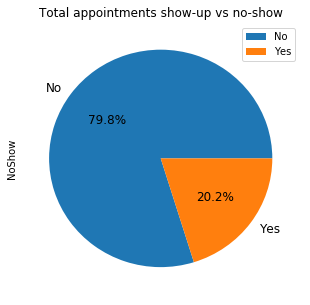

In [5]:
pieChart = df['NoShow'].value_counts()
pieChart2 = pieChart.plot.pie(figsize=(5,5), autopct='%1.1f%%', fontsize = 12);
plt.legend();
plt.title('Total appointments show-up vs no-show')

It is good that the largest percentage is for those who attend the appointment.

### Research Question 2  (How does receiving SMS affect attendance?)

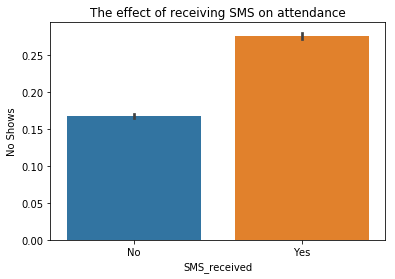

In [8]:
df['BinNoShow'] = (df.NoShow == "Yes").astype(int)
yesno = {1:'Yes', 0:'No'}
ax = sns.barplot(x=df.SMS_received.map(yesno), y=df.BinNoShow)
ax.set_ylabel('No Shows')
plt.title('The effect of receiving SMS on attendance')
plt.show()

Unexpectedly, the no-show rate is higher when receiving SMS messages.

### Research Question 3  (Are women more committed to attending and are older people more committed to attending or not?)

Text(0.5,1,'Age and gender are committed to attend')

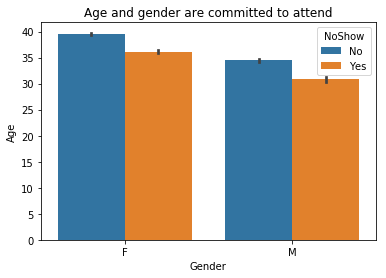

In [10]:
sns.barplot(x="Gender", hue="NoShow", y="Age", data=df)
plt.title('Age and gender are committed to attend')

Women are more to attend appointments than men, and older adults are more committed to attending.

<a id='conclusions'></a>
## Conclusions

Finally, this data was analyzed and the questions answered, and we found that there is an unexpected answer to the question: How does receiving SMS affect attendance? This makes us wonder more about SMS messages and for question: What is the total appointments attendance vs no-show? It was good that most of the people attended the appointment and for the last question: Are women more committed to attending and are older people more committed to attending or not? We found that women are more committed and also people of older age are committed to attending.
I faced some limitations like: 
-Erroneous -1 age values.
-Name of variable No-show.

In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0